In [3]:
print("hello")


hello


In [36]:
import pandas as pd

# Optional for better visuals
sns.set(style="whitegrid")
df = pd.read_csv("../data/benin-malanville.csv")
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [6]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})
missing_report[missing_report['Missing %'] > 5]


,Missing Count,Missing %
Comments,525600,100.0


Outlier Detection and Basic Cleaning

In [7]:
from scipy.stats import zscore
import numpy as np

columns_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Z-score calculation
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)

# Flagging outliers
df["outlier_flag"] = outliers.any(axis=1)

# Impute or drop
df_cleaned = df.copy()

for col in columns_to_check:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Drop or mark rows if needed
 #df_cleaned = df_cleaned[~df_cleaned["outlier_flag"]]


Export Clean Dataset

In [8]:
df_cleaned.to_csv("../data/benin_clean.csv", index=False)


Time Series Analysis

<Figure size 1200x600 with 0 Axes>

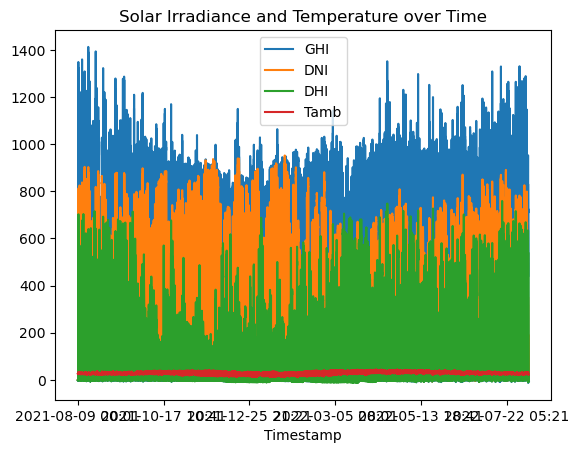

In [9]:
import matplotlib.pyplot as plt

#df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Adjust if needed

plt.figure(figsize=(12, 6))
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot()
plt.title("Solar Irradiance and Temperature over Time")
plt.show()


Cleaning Impact on ModA & ModB

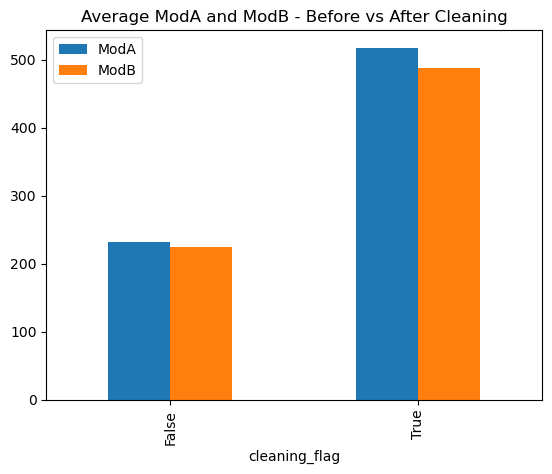

In [10]:
df["cleaning_flag"] = df["outlier_flag"]  # You can also define it differently

df.groupby("cleaning_flag")[["ModA", "ModB"]].mean().plot(kind="bar")
plt.title("Average ModA and ModB - Before vs After Cleaning")
plt.show()



Corrolation Heatmap

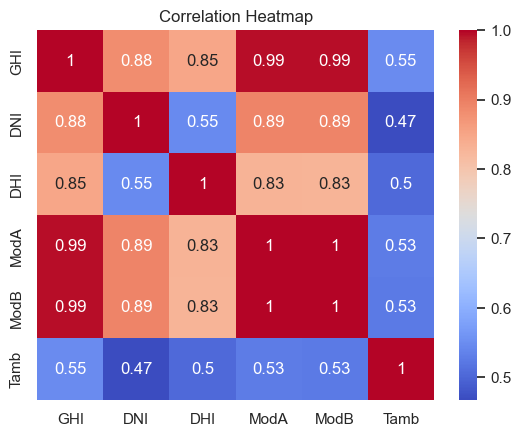

In [37]:
import seaborn as sns

corr_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb"]
corr = df_cleaned[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Wind & Distribution Analysis Histogram

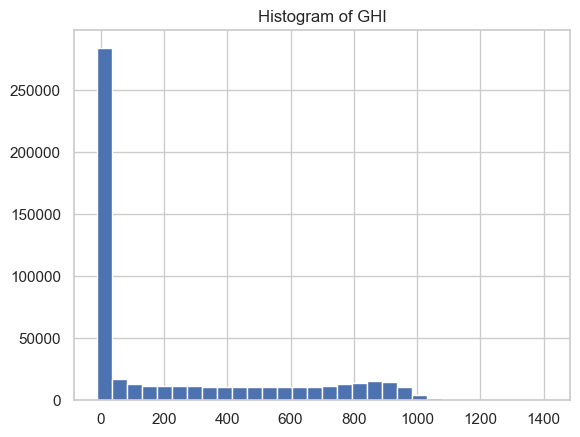

In [38]:
df_cleaned["GHI"].hist(bins=30)
plt.title("Histogram of GHI")
plt.show()


Temperature & Humidity

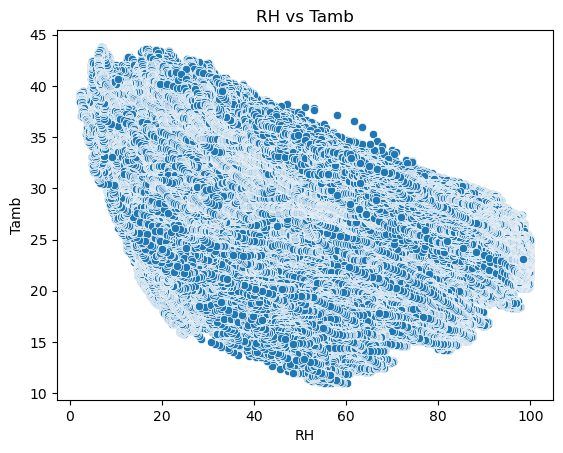

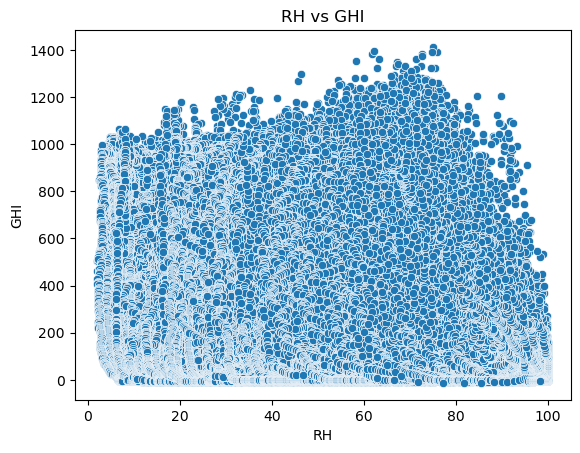

In [25]:
sns.scatterplot(x="RH", y="Tamb", data=df_cleaned)
plt.title("RH vs Tamb")
plt.show()

sns.scatterplot(x="RH", y="GHI", data=df_cleaned)
plt.title("RH vs GHI")
plt.show()


Bubble Chart: GHI vs Tamb with RP/BP

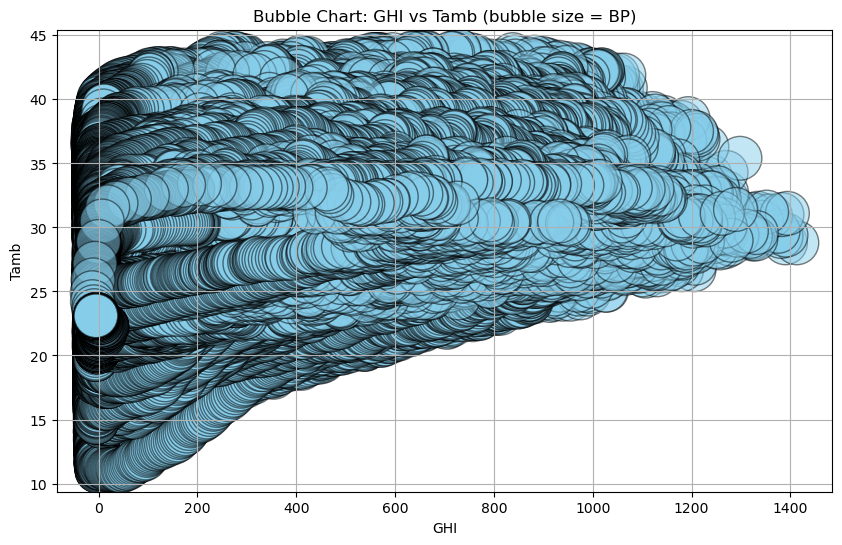

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["GHI"], df_cleaned["Tamb"], 
            s=df_cleaned["BP"], alpha=0.5, c='skyblue', edgecolors='k')

plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (bubble size = BP)")
plt.grid(True)
plt.show()


In [35]:
print(df_cleaned.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'outlier_flag'],
      dtype='object')
